In [4]:
import pandas as pd

In [5]:
csv = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
!head -n 1 NYPD_Complaint_Data_Historic.csv > file.csv
!grep /2019, NYPD_Complaint_Data_Historic.csv >> file.csv

In [3]:
csv = pd.read_csv('file.csv')

NameError: name 'pd' is not defined

In [6]:
df = csv[['Latitude','Longitude','SUSP_RACE','VIC_RACE','PD_CD']]

In [7]:
df['issue_type'] = df['PD_CD'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df

,Latitude,Longitude,SUSP_RACE,VIC_RACE,PD_CD,issue_type
0,40.669414,-73.912603,NaN,BLACK,321.0,321.0
1,40.801978,-73.945511,NaN,UNKNOWN,782.0,782.0
2,40.699990,-73.830978,NaN,UNKNOWN,375.0,375.0
3,40.681005,-73.955035,NaN,UNKNOWN,333.0,333.0
4,NaN,NaN,NaN,WHITE,739.0,739.0
...,...,...,...,...,...,...
6847939,40.672270,-73.875569,NaN,UNKNOWN,707.0,707.0
6847940,40.829882,-73.936758,UNKNOWN,BLACK,638.0,638.0
6847941,40.846592,-73.852913,NaN,WHITE,109.0,109.0
6847942,40.728720,-73.853513,NaN,UNKNOWN,321.0,321.0


In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)

In [9]:
df['srace_factor'] = pd.factorize(df['SUSP_RACE'])[0]
df['vrace_factor'] = pd.factorize(df['VIC_RACE'])[0]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df

,Latitude,Longitude,SUSP_RACE,VIC_RACE,PD_CD,issue_type,srace_factor,vrace_factor
0,40.669414,-73.912603,NaN,BLACK,321.0,321.0,-1,0
1,40.801978,-73.945511,NaN,UNKNOWN,782.0,782.0,-1,1
2,40.699990,-73.830978,NaN,UNKNOWN,375.0,375.0,-1,1
3,40.681005,-73.955035,NaN,UNKNOWN,333.0,333.0,-1,1
4,NaN,NaN,NaN,WHITE,739.0,739.0,-1,2
...,...,...,...,...,...,...,...,...
6847939,40.672270,-73.875569,NaN,UNKNOWN,707.0,707.0,-1,1
6847940,40.829882,-73.936758,UNKNOWN,BLACK,638.0,638.0,0,0
6847941,40.846592,-73.852913,NaN,WHITE,109.0,109.0,-1,2
6847942,40.728720,-73.853513,NaN,UNKNOWN,321.0,321.0,-1,1


In [13]:
clf = tree.DecisionTreeClassifier()

In [46]:
clf = clf.fit(X, y)
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [14]:
W = df.dropna()
X=W[["Latitude","Longitude","srace_factor","vrace_factor"]].to_numpy()
#y = df['issue_type']
y= W["PD_CD"]

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [20]:
clf = clf.fit(X,y)

[Text(167.4, 199.32, 'X[2] <= 0.5\ngini = 0.942\nsamples = 3286689\nvalue = [379749, 23, 45, 65, 14741, 7299, 34, 328, 138013\n461, 278, 586, 61334, 16144, 5343, 15055, 1, 2, 11\n98, 4, 1, 1961, 1424, 9969, 1616, 3, 335, 200\n3880, 2755, 222, 22861, 98, 2445, 4, 3034, 207, 998\n581, 1, 248, 38, 115, 1124, 857, 129, 1105, 57142\n1486, 1710, 3859, 808, 13822, 1010, 5501, 11011, 1334\n29552, 17701, 4440, 1974, 1162, 209, 586, 1091, 419\n19, 64700, 2189, 23474, 87385, 48, 1766, 532, 18\n181, 15683, 1233, 21506, 274, 2627, 4, 545, 8, 7\n13, 12, 12, 33, 6, 3, 2480, 3048, 2382, 3768, 7807\n48657, 37, 9, 119, 47, 123755, 673, 101875, 36112\n93, 3, 13674, 178, 8, 1150, 8429, 86, 73, 13, 22\n2, 7682, 514, 3142, 420, 177, 1554, 2342, 243, 53\n623, 2108, 856, 1862, 26, 5116, 955, 8863, 198\n30154, 462, 17336, 7733, 3771, 1471, 1602, 190, 581\n481, 2474, 90290, 5820, 10589, 2143, 3714, 7106, 8351\n12960, 3163, 5347, 1771, 2689, 2832, 2770, 7256, 2120\n2872, 8080, 1941, 7339, 1791, 28695, 1835, 1647

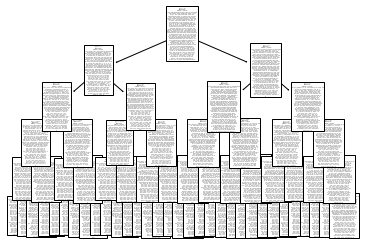

In [21]:
tree.plot_tree(clf.fit(X,y))

In [22]:
!pip install graphviz

In [23]:
import graphviz
data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(data)

In [25]:
!yes | conda install graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    hfb77d84_1002         1.5 MB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    fribidi-1.0.5              |    h516909a_1002         112 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  conda-forge
    glib-2.58.3                |py37h6f030ca_1002         3.3 MB  conda-forge
    graphite2-1.3.13           |    hf484d3e_1000         109 KB  conda-forge
    graphviz-2.

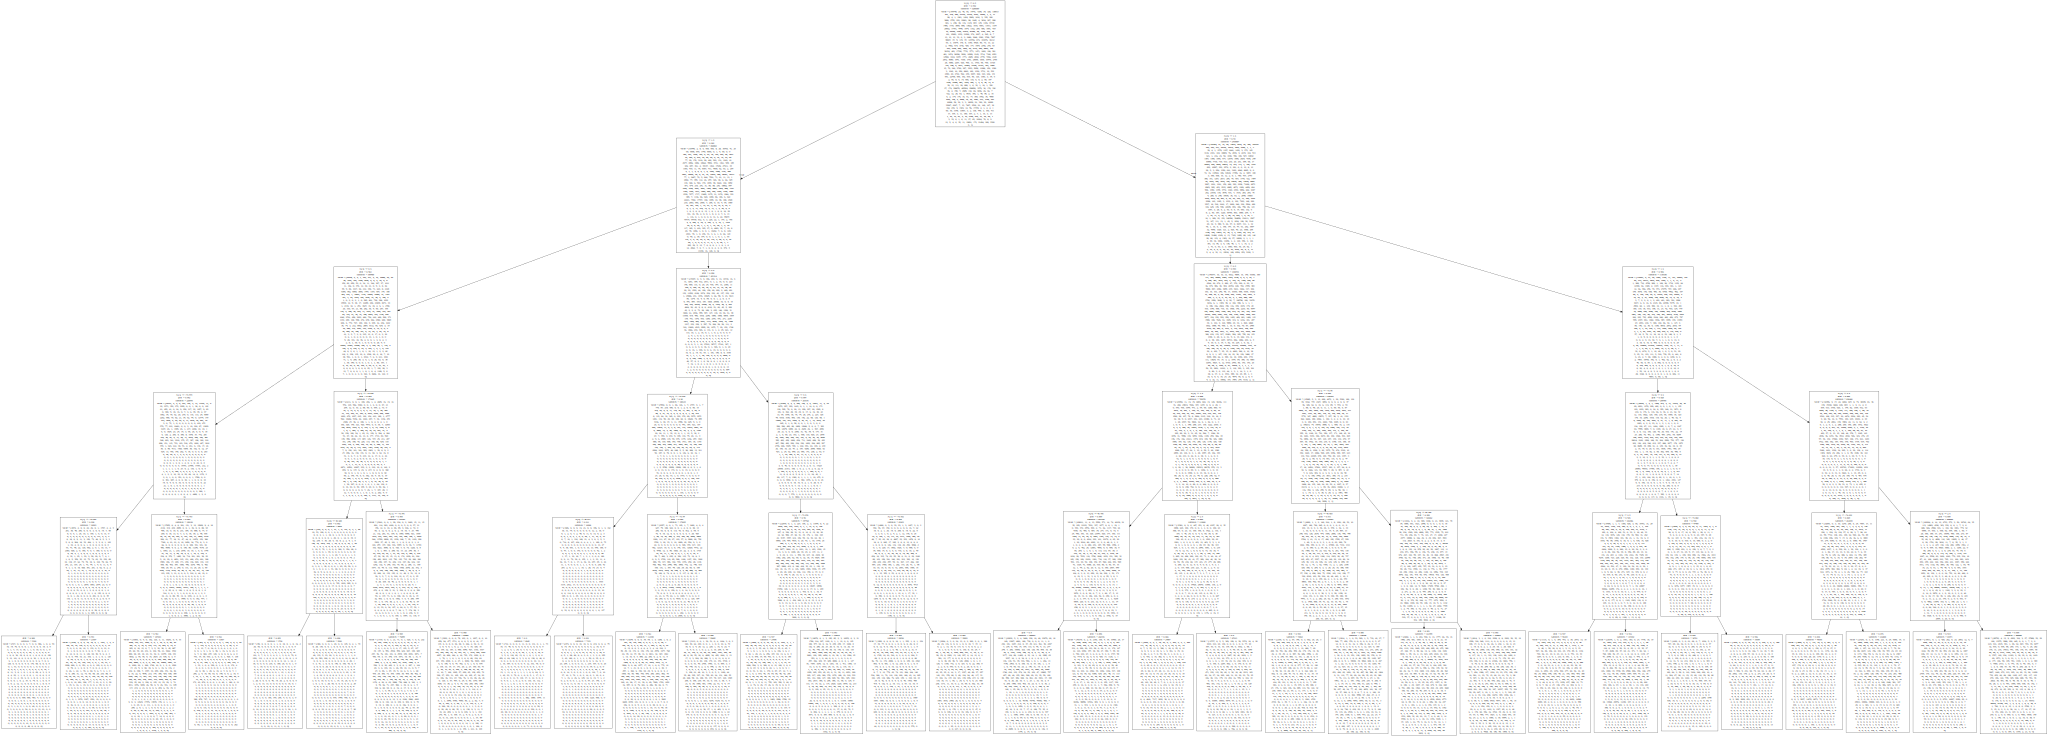

In [26]:
graph

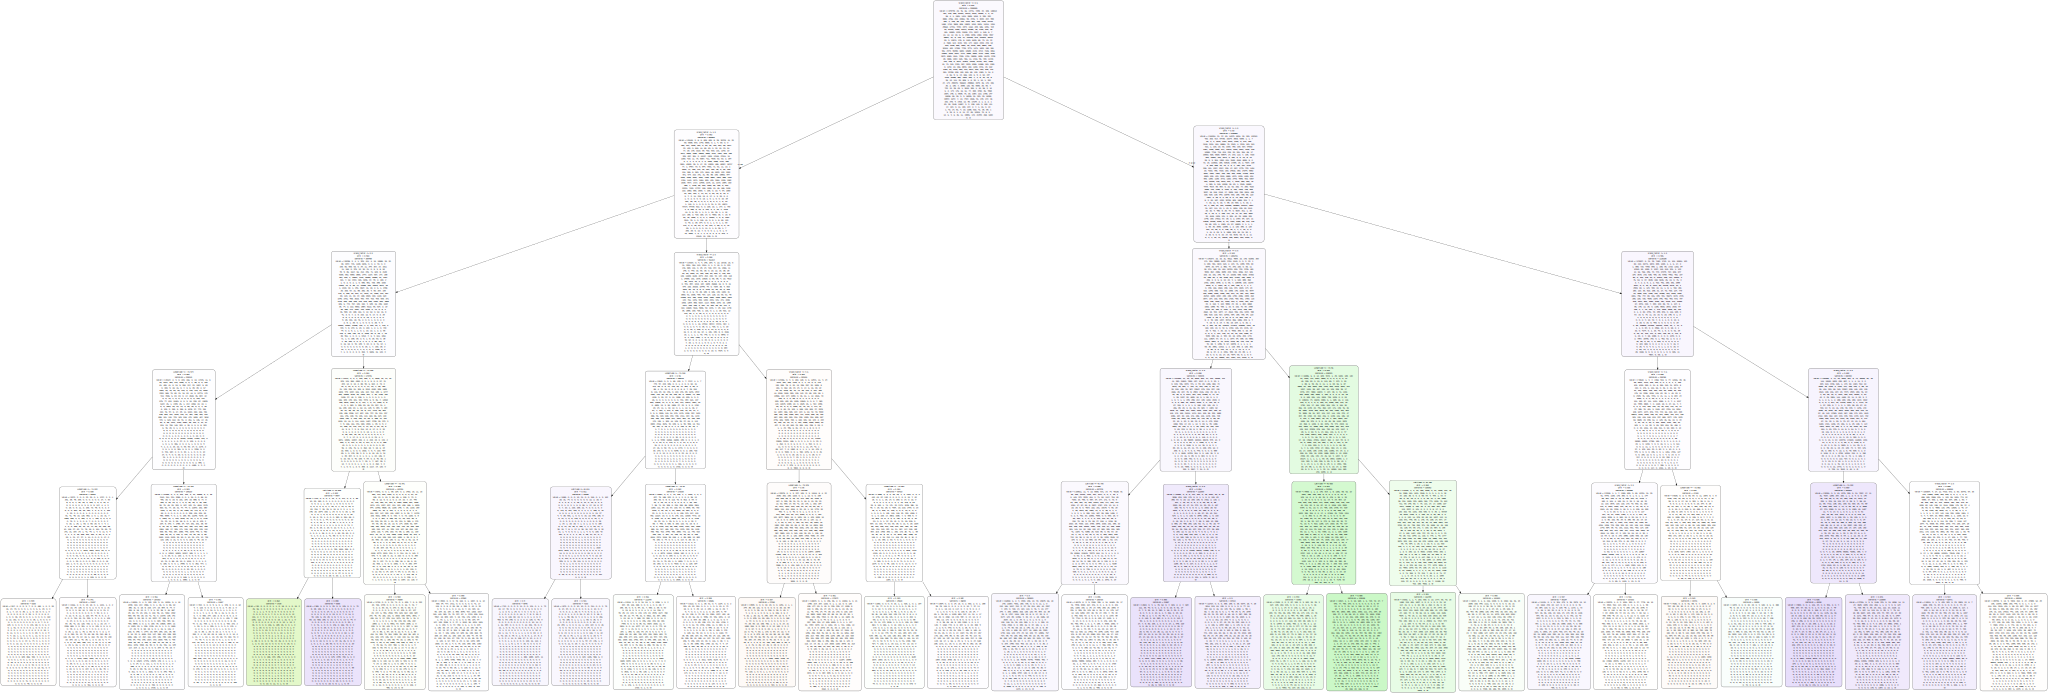

In [30]:
graphviz.Source(tree.export_graphviz(clf, out_file=None,
                              feature_names=["Latitude","Longitude","srace_factor","vrace_factor"],
                              filled=True, rounded=True))

In [34]:
from sklearn.tree.export import export_text
print(export_text(clf, feature_names=["Latitude","Longitude","srace_factor","vrace_factor"]))

|--- srace_factor <= 0.50
|   |--- vrace_factor <= 1.50
|   |   |--- vrace_factor <= 0.50
|   |   |   |--- Longitude <= -73.97
|   |   |   |   |--- Longitude <= -74.02
|   |   |   |   |   |--- class: 101.0
|   |   |   |   |--- Longitude >  -74.02
|   |   |   |   |   |--- class: 637.0
|   |   |   |--- Longitude >  -73.97
|   |   |   |   |--- Longitude <= -73.75
|   |   |   |   |   |--- class: 638.0
|   |   |   |   |--- Longitude >  -73.75
|   |   |   |   |   |--- class: 638.0
|   |   |--- vrace_factor >  0.50
|   |   |   |--- Longitude <= -74.03
|   |   |   |   |--- Latitude <= 40.61
|   |   |   |   |   |--- class: 258.0
|   |   |   |   |--- Latitude >  40.61
|   |   |   |   |   |--- class: 638.0
|   |   |   |--- Longitude >  -74.03
|   |   |   |   |--- Longitude <= -73.94
|   |   |   |   |   |--- class: 258.0
|   |   |   |   |--- Longitude >  -73.94
|   |   |   |   |   |--- class: 638.0
|   |--- vrace_factor >  1.50
|   |   |--- vrace_factor <= 2.50
|   |   |   |--- Longitude <= -74.02

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')